## Instalando dependências

In [16]:
!pip install psycopg2-binary matplotlib seaborn plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.3/407.3 kB 4.5 MB/s eta 0:00:00a 0:00:01


## Inicializando banco

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ajuste conforme suas credenciais do container
USER = "user"
PASSWORD = "password"
HOST = "postgres"
PORT = "5432"
DB = "mydatabase"

engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}")

print("✅ Bibliotecas carregadas e conexão com banco estabelecida!")

✅ Bibliotecas carregadas e conexão com banco estabelecida!


## 1 - Quem são os meus 10 maiores clientes, em termos de vendas ($)?

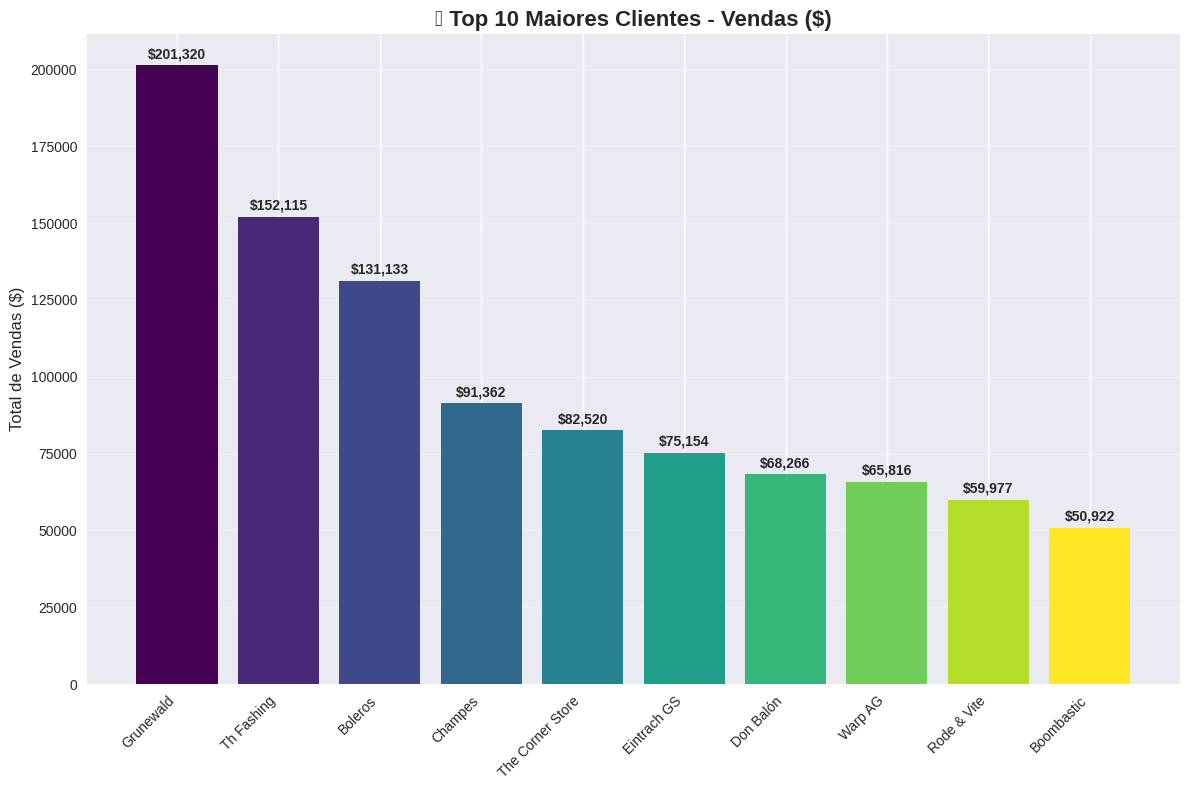


📊 RESUMO - Top 10 Maiores Clientes:
   • Total de vendas dos top 10: $978,585.17
   • Maior cliente: Grunewald ($201,320.49)
   • Menor do top 10: Boombastic ($50,922.49)
   • Diferença entre 1º e 10º: $150,398.00
   • Participação do maior cliente: 20.6%


In [23]:
query_maiores_clientes_vendas = """
SELECT
    c.nome,
    SUM(v.valor_vendas) AS valor
FROM clientes c
JOIN pedidos p ON p.cliente_id = c.id
JOIN vendas v ON v.pedido_id = p.id
GROUP BY (c.nome)
ORDER BY SUM(v.valor_vendas) DESC
LIMIT 10;
"""

df_maiores_clientes_vendas = pd.read_sql(query_maiores_clientes_vendas, engine)
df_maiores_clientes_vendas

# Gráfico de barras verticais - Top 10 Maiores Clientes
plt.figure(figsize=(12, 8))

bars = plt.bar(range(len(df_maiores_clientes_vendas)), df_maiores_clientes_vendas['valor'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(df_maiores_clientes_vendas))))
plt.xticks(range(len(df_maiores_clientes_vendas)), df_maiores_clientes_vendas['nome'], rotation=45, ha='right')
plt.title('🏆 Top 10 Maiores Clientes - Vendas ($)', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumo estatístico
print(f"\n📊 RESUMO - Top 10 Maiores Clientes:")
print(f"   • Total de vendas dos top 10: ${df_maiores_clientes_vendas['valor'].sum():,.2f}")
print(f"   • Maior cliente: {df_maiores_clientes_vendas.iloc[0]['nome']} (${df_maiores_clientes_vendas.iloc[0]['valor']:,.2f})")
print(f"   • Menor do top 10: {df_maiores_clientes_vendas.iloc[9]['nome']} (${df_maiores_clientes_vendas.iloc[9]['valor']:,.2f})")
print(f"   • Diferença entre 1º e 10º: ${df_maiores_clientes_vendas.iloc[0]['valor'] - df_maiores_clientes_vendas.iloc[9]['valor']:,.2f}")
print(f"   • Participação do maior cliente: {(df_maiores_clientes_vendas.iloc[0]['valor']/df_maiores_clientes_vendas['valor'].sum())*100:.1f}%")

## 2 - Quais os três maiores países, em termos de vendas ($)?

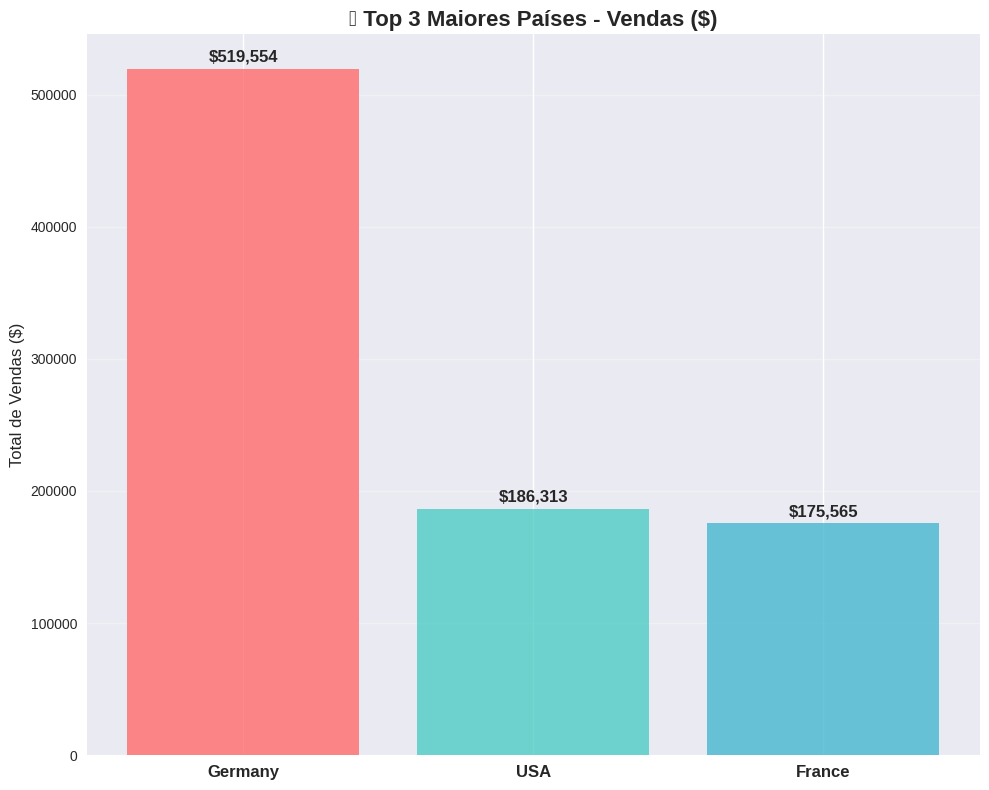


🎯 RESUMO - Top 3 Maiores Países:
   • Total de vendas dos top 3: $881,432.46
   • 1º lugar: Germany ($519,553.87)
   • 2º lugar: USA ($186,313.27)
   • 3º lugar: France ($175,565.32)
   • Participação do 1º lugar: 58.9%


In [29]:
query_tres_maiores_paises_vendas = """
SELECT
    pa.nome AS pais,
    SUM(v.valor_vendas) AS valor
FROM clientes c
JOIN pedidos p ON p.cliente_id = c.id
JOIN vendas v ON v.pedido_id = p.id
JOIN paises pa ON c.pais_id = pa.id
GROUP BY (pa.nome)
ORDER BY SUM(v.valor_vendas) DESC
LIMIT 3;
"""

df_tres_maiores_paises_vendas = pd.read_sql(query_tres_maiores_paises_vendas, engine)
df_tres_maiores_paises_vendas

# Gráfico de barras verticais - Top 3 Maiores Países
plt.figure(figsize=(10, 8))

bars = plt.bar(range(len(df_tres_maiores_paises_vendas)), df_tres_maiores_paises_vendas['valor'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xticks(range(len(df_tres_maiores_paises_vendas)), df_tres_maiores_paises_vendas['pais'], 
           fontsize=12, fontweight='bold')
plt.title('🌍 Top 3 Maiores Países - Vendas ($)', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumo estatístico
print(f"\n🎯 RESUMO - Top 3 Maiores Países:")
print(f"   • Total de vendas dos top 3: ${df_tres_maiores_paises_vendas['valor'].sum():,.2f}")
print(f"   • 1º lugar: {df_tres_maiores_paises_vendas.iloc[0]['pais']} (${df_tres_maiores_paises_vendas.iloc[0]['valor']:,.2f})")
print(f"   • 2º lugar: {df_tres_maiores_paises_vendas.iloc[1]['pais']} (${df_tres_maiores_paises_vendas.iloc[1]['valor']:,.2f})")
print(f"   • 3º lugar: {df_tres_maiores_paises_vendas.iloc[2]['pais']} (${df_tres_maiores_paises_vendas.iloc[2]['valor']:,.2f})")
print(f"   • Participação do 1º lugar: {(df_tres_maiores_paises_vendas.iloc[0]['valor']/df_tres_maiores_paises_vendas['valor'].sum())*100:.1f}%")

## 3 - Quais as categorias de produtos que geram maior faturamento (vendas $) no Brasil?

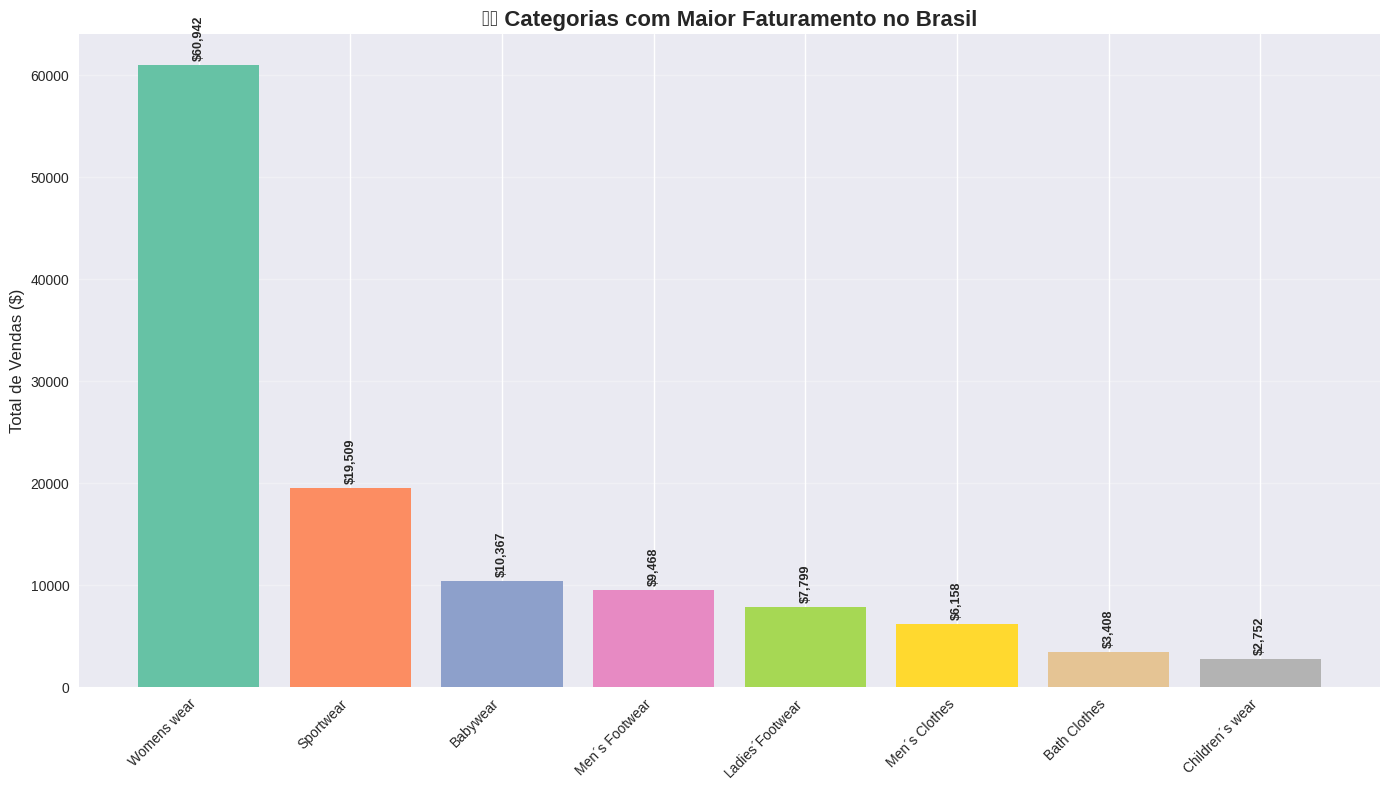


🎯 RESUMO - Categorias no Brasil:
   • Total de categorias: 8
   • Faturamento total no Brasil: $120,402.85
   • Categoria líder: Womens wear ($60,941.74)
   • 2ª categoria: Sportwear ($19,509.42)
   • 3ª categoria: Babywear ($10,367.21)
   • Participação da categoria líder: 50.6%


In [36]:
query_categorias_maior_faturamento = """
SELECT
    ca.nome AS categoria,
    SUM(v.valor_vendas) AS valor
FROM vendas v
JOIN produtos pd ON v.produto_id = pd.id
JOIN categorias ca ON pd.categoria_id = ca.id
JOIN pedidos pe ON v.pedido_id = pe.id
JOIN clientes cl ON pe.cliente_id = cl.id
WHERE cl.pais_id = 'BRA'
GROUP BY (ca.nome)
ORDER BY SUM(v.valor_vendas) DESC;
"""

df_categorias_maior_faturamento = pd.read_sql(query_categorias_maior_faturamento, engine)
df_categorias_maior_faturamento

# Gráfico de barras verticais - Categorias com Maior Faturamento no Brasil
plt.figure(figsize=(14, 8))

bars = plt.bar(range(len(df_categorias_maior_faturamento)), df_categorias_maior_faturamento['valor'], 
               color=plt.cm.Set2(np.linspace(0, 1, len(df_categorias_maior_faturamento))))
plt.xticks(range(len(df_categorias_maior_faturamento)), df_categorias_maior_faturamento['categoria'], 
           rotation=45, ha='right', fontsize=10)
plt.title('🇧🇷 Categorias com Maior Faturamento no Brasil', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)

plt.tight_layout()
plt.show()

# Resumo estatístico
print(f"\n🎯 RESUMO - Categorias no Brasil:")
print(f"   • Total de categorias: {len(df_categorias_maior_faturamento)}")
print(f"   • Faturamento total no Brasil: ${df_categorias_maior_faturamento['valor'].sum():,.2f}")
print(f"   • Categoria líder: {df_categorias_maior_faturamento.iloc[0]['categoria']} (${df_categorias_maior_faturamento.iloc[0]['valor']:,.2f})")
if len(df_categorias_maior_faturamento) > 1:
    print(f"   • 2ª categoria: {df_categorias_maior_faturamento.iloc[1]['categoria']} (${df_categorias_maior_faturamento.iloc[1]['valor']:,.2f})")
if len(df_categorias_maior_faturamento) > 2:
    print(f"   • 3ª categoria: {df_categorias_maior_faturamento.iloc[2]['categoria']} (${df_categorias_maior_faturamento.iloc[2]['valor']:,.2f})")
print(f"   • Participação da categoria líder: {(df_categorias_maior_faturamento.iloc[0]['valor']/df_categorias_maior_faturamento['valor'].sum())*100:.1f}%")

## 8 - Quanto que foi vendido ($) no ano de 2009? Analisando as vendas anuais entre 2009 e 2012, podemos concluir que o faturamento vem crescendo, se mantendo estável ou decaindo?
#### R: Vem crescendo

💰 Total vendido em 2009: $87,666.29


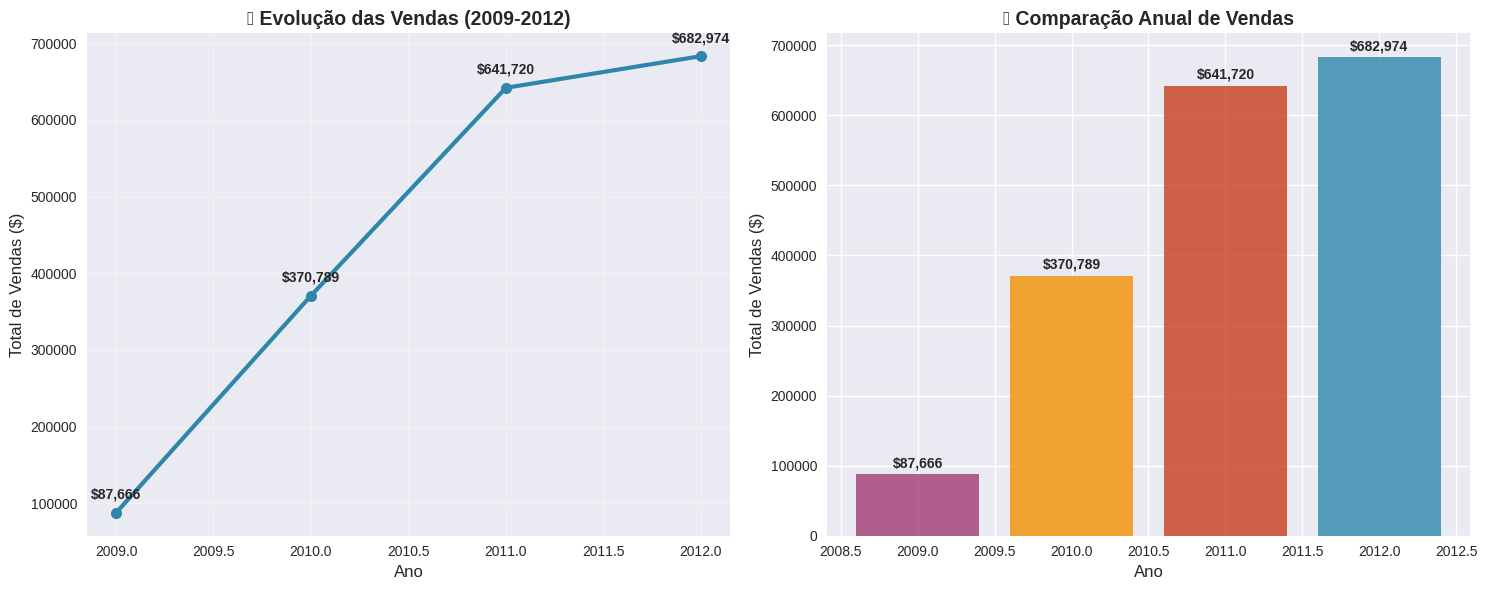


🎯 CONCLUSÃO: O faturamento CRESCEU 679.1% entre 2009 e 2012!
   • 2009: $87,666.29
   • 2012: $682,973.65


In [19]:
query_2009 = """
SELECT SUM(v.valor_vendas) AS total_2009
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
WHERE EXTRACT(YEAR FROM p.data) = 2009;
"""

df_2009 = pd.read_sql(query_2009, engine)
print(f"💰 Total vendido em 2009: ${df_2009['total_2009'].iloc[0]:,.2f}")

query_vendas_anos = """
SELECT EXTRACT(YEAR FROM p.data) AS ano,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
WHERE EXTRACT(YEAR FROM p.data) BETWEEN 2009 AND 2012
GROUP BY ano
ORDER BY ano;
"""

df_vendas_anos = pd.read_sql(query_vendas_anos, engine)
# display(df_vendas_anos)

# Gráfico de linha mostrando a evolução das vendas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de linha
ax1.plot(df_vendas_anos['ano'], df_vendas_anos['total_vendas'], 
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax1.set_title('📈 Evolução das Vendas (2009-2012)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Total de Vendas ($)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Adicionar valores nas linhas
for i, v in enumerate(df_vendas_anos['total_vendas']):
    ax1.annotate(f'${v:,.0f}', (df_vendas_anos['ano'].iloc[i], v), 
                textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

# Gráfico de barras para comparação visual
bars = ax2.bar(df_vendas_anos['ano'], df_vendas_anos['total_vendas'], 
               color=['#A23B72', '#F18F01', '#C73E1D', '#2E86AB'], alpha=0.8)
ax2.set_title('📊 Comparação Anual de Vendas', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calcular crescimento
crescimento = ((df_vendas_anos['total_vendas'].iloc[-1] - df_vendas_anos['total_vendas'].iloc[0]) / 
               df_vendas_anos['total_vendas'].iloc[0]) * 100

print(f"\n🎯 CONCLUSÃO: O faturamento CRESCEU {crescimento:.1f}% entre 2009 e 2012!")
print(f"   • 2009: ${df_vendas_anos['total_vendas'].iloc[0]:,.2f}")
print(f"   • 2012: ${df_vendas_anos['total_vendas'].iloc[-1]:,.2f}")

## 9 - Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos” (Men ́s Footwear) no ano de 2012. Para quais cidades houve venda e quanto?

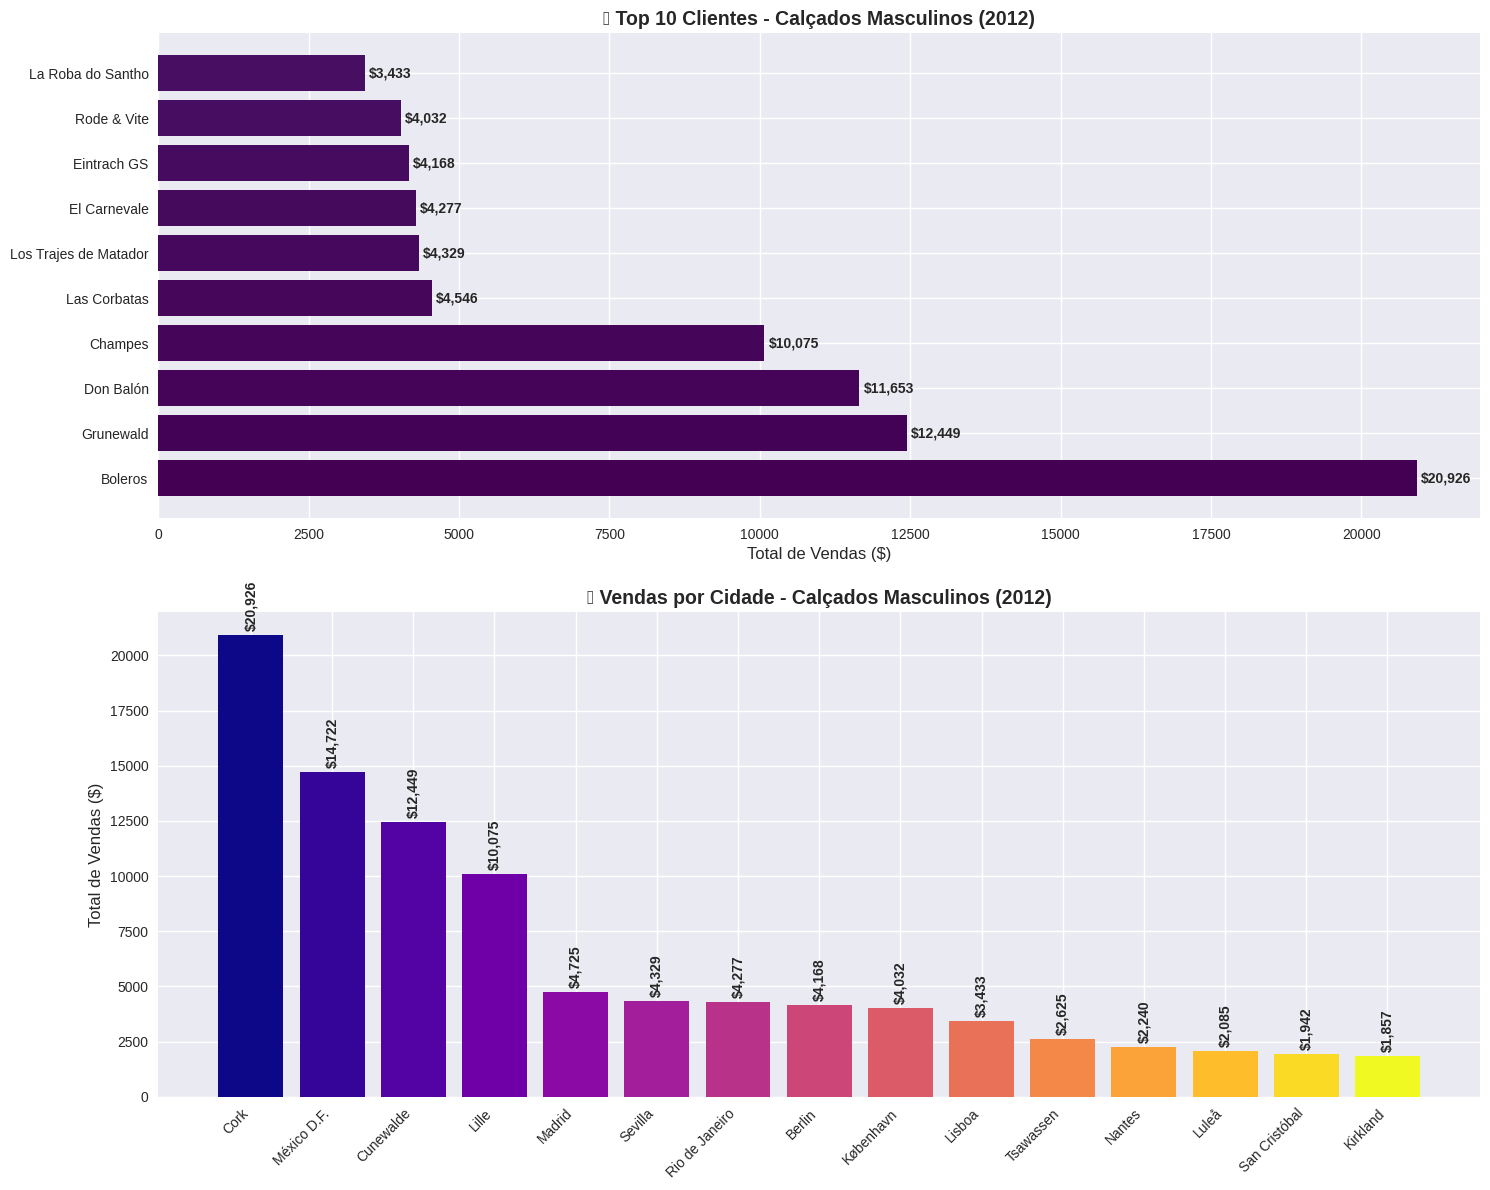


📊 RESUMO - Calçados Masculinos em 2012:
   • Total de clientes: 36
   • Total de cidades atendidas: 31
   • Faturamento total: $104,629.91
   • Maior cliente: Boleros ($20,926.43)
   • Melhor cidade: Cork ($20,926.43)


In [20]:
query_clientes_2012 = """
SELECT c.nome AS cliente,
       c.cidade,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN clientes c ON p.cliente_id = c.id
JOIN produtos pr ON v.produto_id = pr.id
JOIN categorias cat ON pr.categoria_id = cat.id
WHERE cat.nome = 'Men´s Footwear'
  AND EXTRACT(YEAR FROM p.data) = 2012
GROUP BY c.nome, c.cidade
ORDER BY total_vendas DESC;
"""

df_clientes_2012 = pd.read_sql(query_clientes_2012, engine)
# display(df_clientes_2012.head(10))

# Gráficos para análise de clientes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top 10 clientes
top_10_clientes = df_clientes_2012.head(10)
bars1 = ax1.barh(range(len(top_10_clientes)), top_10_clientes['total_vendas'], 
                 color=plt.cm.viridis(range(len(top_10_clientes))))
ax1.set_yticks(range(len(top_10_clientes)))
ax1.set_yticklabels(top_10_clientes['cliente'])
ax1.set_title('🏆 Top 10 Clientes - Calçados Masculinos (2012)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.annotate(f'${width:,.0f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold')

# Vendas por cidade
vendas_por_cidade = df_clientes_2012.groupby('cidade')['total_vendas'].sum().sort_values(ascending=False).head(15)

bars2 = ax2.bar(range(len(vendas_por_cidade)), vendas_por_cidade.values, 
                color=plt.cm.plasma(np.linspace(0, 1, len(vendas_por_cidade))))
ax2.set_xticks(range(len(vendas_por_cidade)))
ax2.set_xticklabels(vendas_por_cidade.index, rotation=45, ha='right')
ax2.set_title('🌆 Vendas por Cidade - Calçados Masculinos (2012)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=90)

plt.tight_layout()
plt.show()

print(f"\n📊 RESUMO - Calçados Masculinos em 2012:")
print(f"   • Total de clientes: {len(df_clientes_2012)}")
print(f"   • Total de cidades atendidas: {df_clientes_2012['cidade'].nunique()}")
print(f"   • Faturamento total: ${df_clientes_2012['total_vendas'].sum():,.2f}")
print(f"   • Maior cliente: {df_clientes_2012.iloc[0]['cliente']} (${df_clientes_2012.iloc[0]['total_vendas']:,.2f})")
print(f"   • Melhor cidade: {vendas_por_cidade.index[0]} (${vendas_por_cidade.iloc[0]:,.2f})")

## 10 - Na Europa, quanto que se vende ($) para cada país?

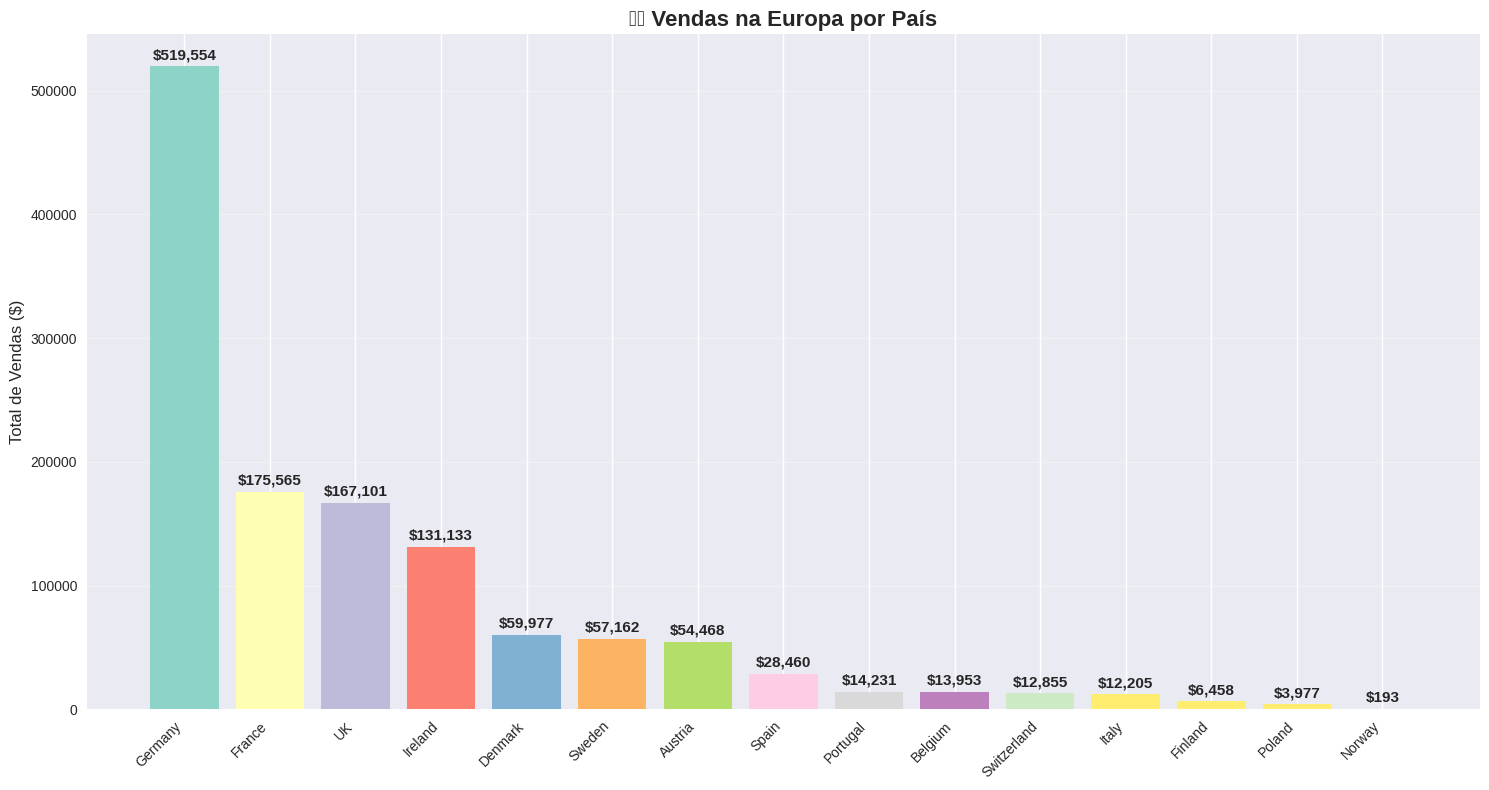


🎯 ANÁLISE EUROPEIA:
   • Países europeus identificados: 15
   • Total de vendas na Europa: $1,257,293.32
   • Melhor país europeu: Germany ($519,553.87)
   • Participação do melhor país: 41.3%


In [21]:
query_paises = """
SELECT pa.nome AS pais,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN clientes c ON p.cliente_id = c.id
JOIN paises pa ON c.pais_id = pa.id
GROUP BY pa.nome
ORDER BY total_vendas DESC;
"""

df_paises = pd.read_sql(query_paises, engine)
# display(df_paises)

# Identificar países europeus (baseado nos nomes comuns)
paises_europeus = ['Germany', 'France', 'Italy', 'Spain', 'UK', 'Netherlands', 
                   'Belgium', 'Austria', 'Switzerland', 'Portugal', 'Ireland', 'Denmark',
                   'Sweden', 'Norway', 'Finland', 'Poland', 'Czech Republic', 'Hungary']

df_europa = df_paises[df_paises['pais'].isin(paises_europeus)].copy()

if len(df_europa) > 0:
    # Gráfico de barras para países europeus
    plt.figure(figsize=(15, 8))
    
    bars = plt.bar(range(len(df_europa)), df_europa['total_vendas'], 
                   color=plt.cm.Set3(range(len(df_europa))))
    plt.xticks(range(len(df_europa)), df_europa['pais'], rotation=45, ha='right')
    plt.title('🇪🇺 Vendas na Europa por País', fontsize=16, fontweight='bold')
    plt.ylabel('Total de Vendas ($)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Gráfico de pizza interativo com Plotly
    fig_pie = px.pie(df_europa, values='total_vendas', names='pais', 
                     title='🥧 Distribuição das Vendas na Europa',
                     color_discrete_sequence=px.colors.qualitative.Set3)
    fig_pie.update_traces(textposition='inside', textinfo='percent+label')
    fig_pie.update_layout(font=dict(size=14))
    fig_pie.show()
    
    print(f"\n🎯 ANÁLISE EUROPEIA:")
    print(f"   • Países europeus identificados: {len(df_europa)}")
    print(f"   • Total de vendas na Europa: ${df_europa['total_vendas'].sum():,.2f}")
    print(f"   • Melhor país europeu: {df_europa.iloc[0]['pais']} (${df_europa.iloc[0]['total_vendas']:,.2f})")
    print(f"   • Participação do melhor país: {(df_europa.iloc[0]['total_vendas']/df_europa['total_vendas'].sum())*100:.1f}%")
else:
    print("⚠️  Nenhum país europeu identificado nos dados. Mostrando todos os países:")
    
    # Gráfico para todos os países se não houver países europeus identificados
    plt.figure(figsize=(15, 8))
    top_15_paises = df_paises.head(15)
    
    bars = plt.bar(range(len(top_15_paises)), top_15_paises['total_vendas'], 
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_15_paises))))
    plt.xticks(range(len(top_15_paises)), top_15_paises['pais'], rotation=45, ha='right')
    plt.title('🌍 Top 15 Países por Vendas', fontsize=16, fontweight='bold')
    plt.ylabel('Total de Vendas ($)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()